In [1]:
import pandas as pd
import re
data = pd.read_csv('filtered_final_data.csv')
print(data.shape)
data.head()

(4144, 20)


,Title,Company_Name,Location,Via,Schedule_Type,Min_Salary,Max_Salary,Programming_Languages,Visualization_Tools,Databases_and_Big_Data_Tools,ML_and_Data_Science_Libraries,Cloud_Services,Education,Experience,Soft_Skills,Industries,Work_Mode,job_position,level,State
0,Data Scientist,Apple,"Austin, TX",Careers At Apple,Full-time,NaN,NaN,"sql, python",tableau,mysql,NaN,"docker, kubernetes",bachelor,5.0,"communication skills, collaboration, leadership",NaN,NaN,Data Scientist,Unspecified,TX
1,Data Scientist,Select Minds LLC,"Dallas, TX",LinkedIn,Full-time,NaN,NaN,"r, sql, python",tableau,NaN,NaN,NaN,bachelor,NaN,communication skills,NaN,NaN,Data Scientist,Unspecified,TX
2,Principal Data Scientist,MD Anderson,"Houston, TX",MD Anderson - MD Anderson Cancer Center,Full-time,NaN,NaN,python,NaN,NaN,"tensorflow, pytorch, scikit-learn",aws,bachelor,5.0,"decision-making, collaboration, collaboration,...",healthcare,remote,Data Scientist,Senior-level,TX
3,Data Scientist - Causal Discovery,CPChem,"The Woodlands, TX",Careers At Chevron Phillips - Chevron Phillips...,Full-time,NaN,NaN,"go, r, sql, python",NaN,spark,NaN,"microsoft azure, aws",master,NaN,"communication skills, decision-making","manufacturing, finance",NaN,Data Scientist,Unspecified,TX
4,Senior Data Scientist-Remote,Baker Hughes,"Houston, TX (+1 other)",Baker Hughes,Full-time,104000.0,150000.0,"scala, r, python",NaN,spark,"tensorflow, keras",NaN,master,NaN,communication skills,"technology, technology",remote,Data Scientist,Senior-level,TX


In [2]:
#data.drop(['Cloud_Services'], axis=1, inplace=True)

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Title                               0
Company_Name                        0
Location                            4
Via                                 0
Schedule_Type                     861
Min_Salary                       3279
Max_Salary                       3279
Programming_Languages            1287
Visualization_Tools              3186
Databases_and_Big_Data_Tools     3181
ML_and_Data_Science_Libraries    3510
Cloud_Services                   3098
Education                        1428
Experience                       2652
Soft_Skills                      1121
Industries                       1622
Work_Mode                        2199
job_position                        0
level                               0
State                              26
dtype: int64

In [4]:
# Find the number of missing values in each row and delete rows with more than 12 missing values
rows_with_many_missing = data[data.isnull().sum(axis=1) > 12]
data = data[data.isnull().sum(axis=1) <= 12]
data.shape

(4120, 20)

In [5]:
#data['Location'] = data['Location'].ffill()

In [6]:
# Columns to impute
columns_to_impute = [
    'Programming_Languages',
    'Visualization_Tools',
    'Databases_and_Big_Data_Tools',
    'ML_and_Data_Science_Libraries',
    'Cloud_Services',
    'Education',
    'Work_Mode',
    'Soft_Skills'
]

# Define a function to impute missing values with mode within groups
def impute_with_group_mode(df, group_cols, target_cols):
    for col in target_cols:
        df[col] = df.groupby(group_cols)[col].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
    return df

# Apply the function to the data
data = impute_with_group_mode(data, ['job_position', 'level'], columns_to_impute)

In [7]:
# Define a function to impute missing values with mode within a single group
def impute_with_single_group_mode(df, group_col, target_cols):
    for col in target_cols:
        df[col] = df.groupby(group_col)[col].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
    return df

# Apply the function to the data using only job_position as the group
data = impute_with_single_group_mode(data, 'job_position', columns_to_impute)

In [8]:
data.head(30)

,Title,Company_Name,Location,Via,Schedule_Type,Min_Salary,Max_Salary,Programming_Languages,Visualization_Tools,Databases_and_Big_Data_Tools,ML_and_Data_Science_Libraries,Cloud_Services,Education,Experience,Soft_Skills,Industries,Work_Mode,job_position,level,State
0,Data Scientist,Apple,"Austin, TX",Careers At Apple,Full-time,NaN,NaN,"sql, python",tableau,mysql,"tensorflow, pytorch, scikit-learn","docker, kubernetes",bachelor,5.0,"communication skills, collaboration, leadership",NaN,hybrid,Data Scientist,Unspecified,TX
1,Data Scientist,Select Minds LLC,"Dallas, TX",LinkedIn,Full-time,NaN,NaN,"r, sql, python",tableau,spark,"tensorflow, pytorch, scikit-learn",aws,bachelor,NaN,communication skills,NaN,hybrid,Data Scientist,Unspecified,TX
2,Principal Data Scientist,MD Anderson,"Houston, TX",MD Anderson - MD Anderson Cancer Center,Full-time,NaN,NaN,python,tableau,spark,"tensorflow, pytorch, scikit-learn",aws,bachelor,5.0,"decision-making, collaboration, collaboration,...",healthcare,remote,Data Scientist,Senior-level,TX
3,Data Scientist - Causal Discovery,CPChem,"The Woodlands, TX",Careers At Chevron Phillips - Chevron Phillips...,Full-time,NaN,NaN,"go, r, sql, python",tableau,spark,"tensorflow, pytorch, scikit-learn","microsoft azure, aws",master,NaN,"communication skills, decision-making","manufacturing, finance",hybrid,Data Scientist,Unspecified,TX
4,Senior Data Scientist-Remote,Baker Hughes,"Houston, TX (+1 other)",Baker Hughes,Full-time,104000.0,150000.0,"scala, r, python",tableau,spark,"tensorflow, keras",aws,master,NaN,communication skills,"technology, technology",remote,Data Scientist,Senior-level,TX
5,Imaging Data Scientist - Digital Pathology,MD Anderson,"Houston, TX",MD Anderson - MD Anderson Cancer Center,Full-time,NaN,NaN,python,tableau,spark,"tensorflow, pytorch, scikit-learn",aws,bachelor,3.0,collaboration,technology,hybrid,Data Scientist,Unspecified,TX
6,Data Scientist Principal (REMOTE) – Life Insur...,USAA,"Plano, TX (+6 others)",USAA Careers,Full-time,182680.0,349150.0,"r, python",tableau,spark,"tensorflow, pytorch",aws,bachelor,6.0,"collaboration, leadership","technology, technology, finance",hybrid,Data Scientist,Senior-level,TX
7,"Senior Data Scientist, Performance Analytics",ENGIE,"Houston, TX",Engie.com,Full-time,84000.0,128800.0,"python, r, sql, matlab",tableau,spark,"tensorflow, pytorch",aws,bachelor,NaN,"communication skills, problem-solving",finance,hybrid,Data Scientist,Senior-level,TX
8,Data Scientist – Power Markets modelling,TotalEnergies,"Houston, TX",LinkedIn,Full-time,NaN,NaN,"sql, python",tableau,mongodb,"tensorflow, pytorch, scikit-learn",aws,master,5.0,decision-making,technology,hybrid,Data Scientist,Unspecified,TX
9,Principal Data Scientist,HP Inc.,"Austin, TX",Jobs - Towards AI,Full-time,NaN,NaN,"r, sql, python",tableau,spark,"tensorflow, pytorch",aws,bachelor,NaN,communication skills,NaN,hybrid,Data Scientist,Senior-level,TX


In [9]:
# Fill missing values using the mode
def impute_with_mode_corrected(group):
    for level in group['level'].unique():
        mode_value = group[group['level'] == level]['Experience'].mode()
        if not mode_value.empty:
            group.loc[(group['level'] == level) & (group['Experience'].isnull()), 'Experience'] = mode_value.iloc[0]
    return group

# Group the data and apply the filling function
data = data.groupby('job_position', group_keys=False).apply(impute_with_mode_corrected)

# Ensure the Experience column is of integer type
data['Experience'] = data['Experience'].fillna(0).astype(int)


/var/folders/x3/g5yyxsw94fb80s3tvtxfjv800000gn/T/ipykernel_28160/805104366.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('job_position', group_keys=False).apply(impute_with_mode_corrected)


In [10]:
data= data.drop(columns=['Schedule_Type', 'Industries'])
data.head()

,Title,Company_Name,Location,Via,Min_Salary,Max_Salary,Programming_Languages,Visualization_Tools,Databases_and_Big_Data_Tools,ML_and_Data_Science_Libraries,Cloud_Services,Education,Experience,Soft_Skills,Work_Mode,job_position,level,State
0,Data Scientist,Apple,"Austin, TX",Careers At Apple,NaN,NaN,"sql, python",tableau,mysql,"tensorflow, pytorch, scikit-learn","docker, kubernetes",bachelor,5,"communication skills, collaboration, leadership",hybrid,Data Scientist,Unspecified,TX
1,Data Scientist,Select Minds LLC,"Dallas, TX",LinkedIn,NaN,NaN,"r, sql, python",tableau,spark,"tensorflow, pytorch, scikit-learn",aws,bachelor,3,communication skills,hybrid,Data Scientist,Unspecified,TX
2,Principal Data Scientist,MD Anderson,"Houston, TX",MD Anderson - MD Anderson Cancer Center,NaN,NaN,python,tableau,spark,"tensorflow, pytorch, scikit-learn",aws,bachelor,5,"decision-making, collaboration, collaboration,...",remote,Data Scientist,Senior-level,TX
3,Data Scientist - Causal Discovery,CPChem,"The Woodlands, TX",Careers At Chevron Phillips - Chevron Phillips...,NaN,NaN,"go, r, sql, python",tableau,spark,"tensorflow, pytorch, scikit-learn","microsoft azure, aws",master,3,"communication skills, decision-making",hybrid,Data Scientist,Unspecified,TX
4,Senior Data Scientist-Remote,Baker Hughes,"Houston, TX (+1 other)",Baker Hughes,104000.0,150000.0,"scala, r, python",tableau,spark,"tensorflow, keras",aws,master,5,communication skills,remote,Data Scientist,Senior-level,TX


In [11]:
# Fill missing values in the State column with 'CA'
data['State'] = data['State'].fillna('CA')

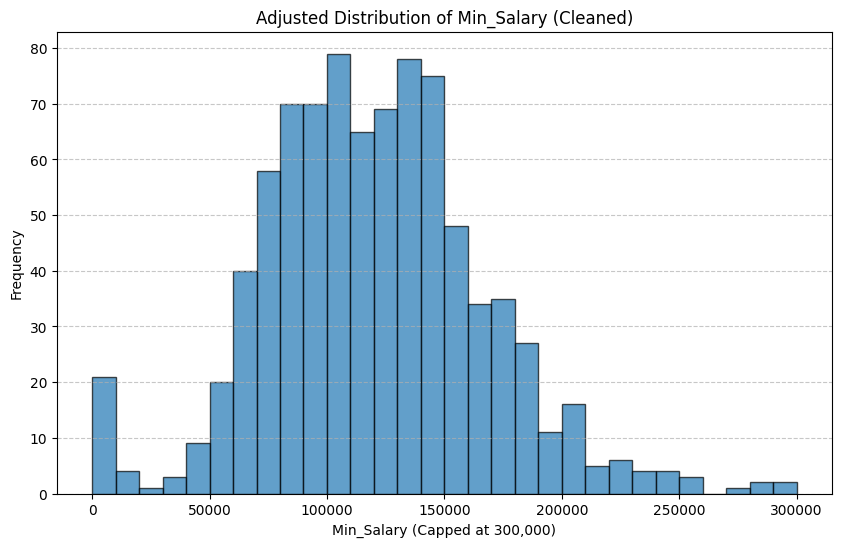

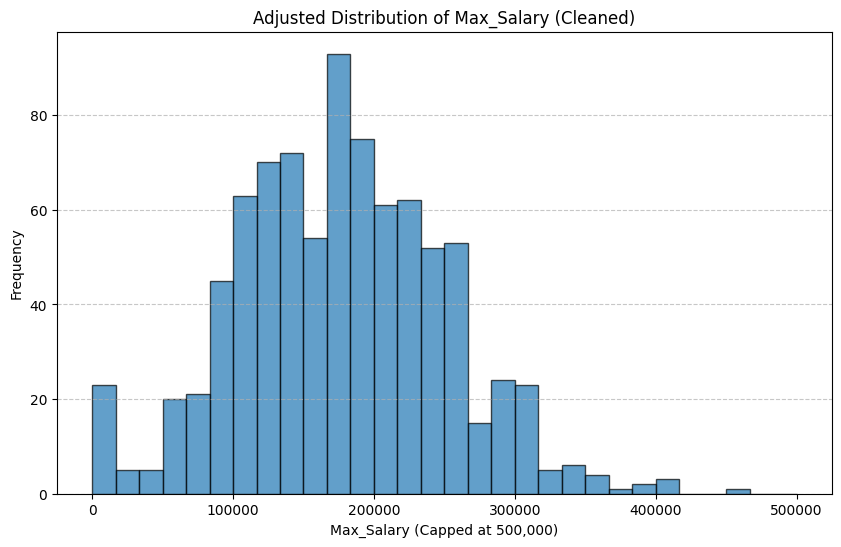

In [12]:
import matplotlib.pyplot as plt

# Plot histograms again, focusing on the main range of the data
plt.figure(figsize=(10, 6))
plt.hist(data['Min_Salary'].dropna(), bins=30, range=(0, 300000), edgecolor='k', alpha=0.7)
plt.title('Adjusted Distribution of Min_Salary (Cleaned)')
plt.xlabel('Min_Salary (Capped at 300,000)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data['Max_Salary'].dropna(), bins=30, range=(0, 500000), edgecolor='k', alpha=0.7)
plt.title('Adjusted Distribution of Max_Salary (Cleaned)')
plt.xlabel('Max_Salary (Capped at 500,000)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
# Define a threshold for identifying hourly rates (e.g., salaries less than $1000 could be hourly)
hourly_threshold = 1200
# Ensure Min_Salary and Max_Salary are numeric
data['Min_Salary'] = pd.to_numeric(data['Min_Salary'], errors='coerce')
data['Max_Salary'] = pd.to_numeric(data['Max_Salary'], errors='coerce')


# Identify potential hourly wage rows based on Min_Salary and Max_Salary
hourly_rows = data[
    (data['Min_Salary'] < hourly_threshold) |
    (data['Max_Salary'] < hourly_threshold)
]

# Convert hourly salaries to annual salaries (assuming 40 hours/week, 52 weeks/year)
hourly_to_annual_multiplier = 40 * 52 

data.loc[
    (data['Min_Salary'] < hourly_threshold), 'Min_Salary'
] *= hourly_to_annual_multiplier
data.loc[
    (data['Max_Salary'] < hourly_threshold), 'Max_Salary'
] *= hourly_to_annual_multiplier

In [14]:
# Set Min_Salary and Max_Salary values of 0 to NaN
data.loc[data['Min_Salary'] == 0, 'Min_Salary'] = None
data.loc[data['Max_Salary'] == 0, 'Max_Salary'] = None

# Re-check the descriptive statistics
salary_stats_cleaned = data[['Min_Salary', 'Max_Salary']].describe()
salary_stats_cleaned

,Min_Salary,Max_Salary
count,8.590000e+02,8.600000e+02
mean,1.366015e+05,2.020449e+05
std,1.788019e+05,2.256891e+05
min,2.024000e+03,2.080000e+03
25%,8.999500e+04,1.280845e+05
50%,1.200000e+05,1.800000e+05
75%,1.492000e+05,2.300000e+05
max,2.337920e+06,4.100000e+06


In [15]:
# Filter the dataset for the required conditions
filtered_data= data[
    (data['Min_Salary'] < 50000) |
    (data['Max_Salary'] < 70000)
]


In [16]:
# Set 'Min_Salary' < 50000 to missing (NaN)
data.loc[data['Min_Salary'] < 50000, 'Min_Salary'] = None

# Set 'Max_Salary' < 50000 to missing (NaN)
data.loc[data['Max_Salary'] < 70000, 'Max_Salary'] = None

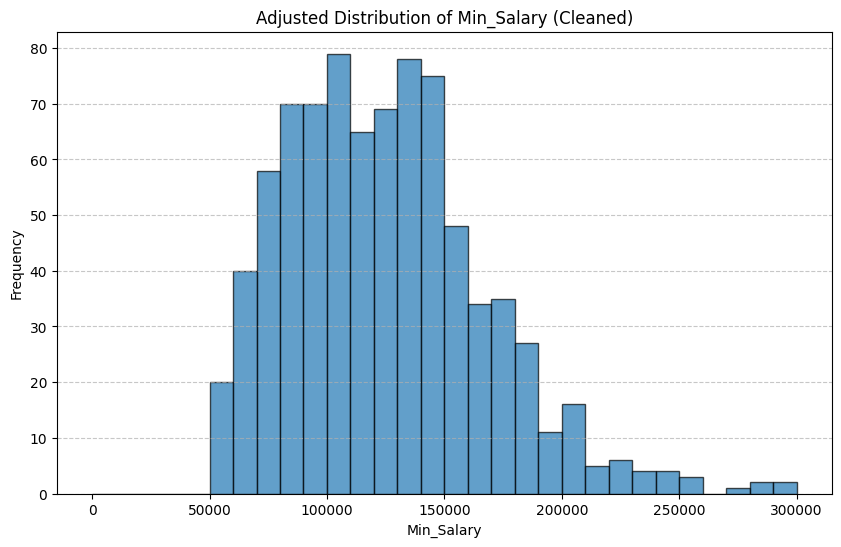

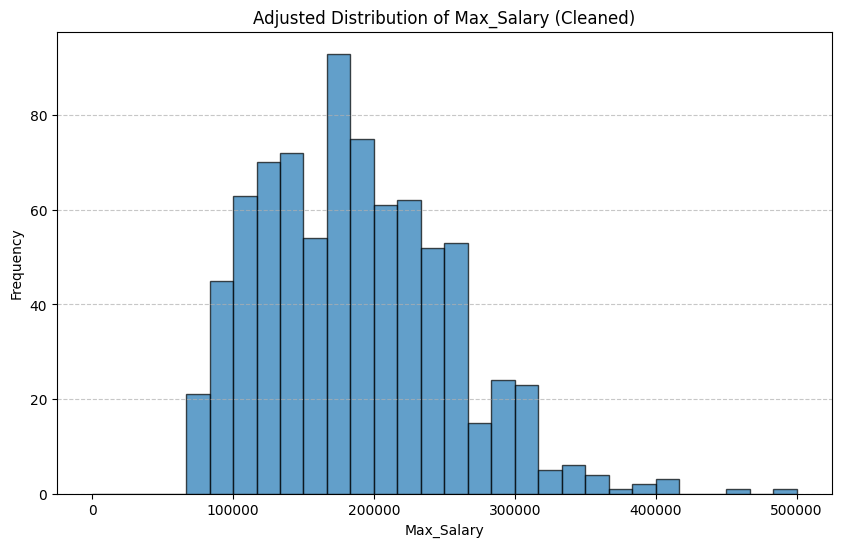

In [17]:
# Plot histograms again, focusing on the main range of the data
plt.figure(figsize=(10, 6))
plt.hist(data['Min_Salary'].dropna(), bins=30, range=(0, 300000), edgecolor='k', alpha=0.7)
plt.title('Adjusted Distribution of Min_Salary (Cleaned)')
plt.xlabel('Min_Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data['Max_Salary'].dropna(), bins=30, range=(0, 500000), edgecolor='k', alpha=0.7)
plt.title('Adjusted Distribution of Max_Salary (Cleaned)')
plt.xlabel('Max_Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
# Calculate IQR
Q1_min, Q3_min = data['Min_Salary'].quantile(0.25), data['Min_Salary'].quantile(0.75)
IQR_min = Q3_min - Q1_min
lower_min = Q1_min - 1.5 * IQR_min
upper_min = Q3_min + 1.5 * IQR_min

Q1_max, Q3_max = data['Max_Salary'].quantile(0.25), data['Max_Salary'].quantile(0.75)
IQR_max = Q3_max - Q1_max
lower_max = Q1_max - 1.5 * IQR_max
upper_max = Q3_max + 1.5 * IQR_max

# Mark outliers
data['Min_Salary_Outlier'] = (data['Min_Salary'] < lower_min) | (data['Min_Salary'] > upper_min)
data['Max_Salary_Outlier'] = (data['Max_Salary'] < lower_max) | (data['Max_Salary'] > upper_max)

# Print Min Salary outliers
print("Min Salary outliers:")
data[data['Min_Salary_Outlier']]

# Print Max Salary outliers
#print("Max Salary outliers:")
#data[data['Max_Salary_Outlier']]


Min Salary outliers:


,Title,Company_Name,Location,Via,Min_Salary,Max_Salary,Programming_Languages,Visualization_Tools,Databases_and_Big_Data_Tools,ML_and_Data_Science_Libraries,Cloud_Services,Education,Experience,Soft_Skills,Work_Mode,job_position,level,State,Min_Salary_Outlier,Max_Salary_Outlier
85,Staff Data Scientist,StubHub,"New York, NY",Lever,240000.0,350000.0,"r, sql, python",tableau,spark,"numpy, pandas, scipy, scikit-learn",aws,bachelor,5,"communication skills, collaboration, creativity",hybrid,Data Scientist,Senior-level,NY,True,False
569,Business Analyst II,"COTIVITI, INC.","South Jordan, UT",Enable America,925000.0,925000.0,sql,tableau,spark,"numpy, pandas",aws,bachelor,3,"communication skills, leadership, problem-solv...",remote,Data Analyst,Unspecified,UT,True,True
744,Senior Staff Machine Learning Engineer - Marke...,Uber,"San Francisco, CA",Uber,252000.0,252000.0,"go, java, python",tableau,spark,"tensorflow, pytorch, scikit-learn",aws,phd,5,collaboration,hybrid,Machine Learning Engineer,Senior-level,CA,True,False
753,Senior Machine Learning Engineer (Computer Vis...,AgZen,"Somerville, MA",LinkedIn,270400.0,270400.0,python,tableau,spark,pytorch,aws,master,5,collaboration,hybrid,Machine Learning Engineer,Senior-level,MA,True,False
1029,Data engineer,Pfizer,"Collegeville, PA",Talent.com,309920.0,515840.0,"scala, sql, python","power bi, tableau","spark, hadoop",pandas,aws,bachelor,5,"collaboration, leadership, problem-solving, co...",hybrid,Data Engineer,Unspecified,PA,True,True
1281,"Staff / Principal Machine Learning Engineer, S...",Inworld AI,"Mountain View, CA",Greenhouse,240000.0,385000.0,r,tableau,spark,pytorch,aws,bachelor,1,"leadership, problem solving",hybrid,Machine Learning Engineer,Senior-level,CA,True,True
1309,Copy of Senior/Staff Machine Learning Engineer...,Synthesia,Anywhere,Jobgether,249600.0,249600.0,python,tableau,spark,"tensorflow, pytorch",aws,bachelor,5,leadership,remote,Machine Learning Engineer,Senior-level,CA,True,False
1316,Principal Machine Learning Engineer,Zoox,"Foster City, CA",Lever,296000.0,451000.0,python,tableau,spark,"tensorflow, pytorch",aws,phd,10,collaboration,hybrid,Machine Learning Engineer,Senior-level,CA,True,True
1330,"Sr Staff Engineer, Generative AI",Uber,"San Francisco, CA",Uber,252000.0,252000.0,"go, java",tableau,spark,"tensorflow, pytorch",aws,phd,5,"communication, collaboration, communication",hybrid,Machine Learning Engineer,Senior-level,CA,True,False
1334,AIML - Sr. Director of Machine Learning Applie...,Apple,"Cupertino, CA",Careers At Apple,349000.0,558700.0,"r, python","matplotlib, tableau, seaborn",spark,"numpy, pytorch, scikit-learn, pandas",aws,phd,5,"communication skills, critical thinking, probl...",hybrid,Machine Learning Engineer,Executive-level,CA,True,True


In [19]:
import numpy as np
data.loc[data['Min_Salary'] > 500000, 'Min_Salary'] = np.nan

In [20]:
# Print Max Salary outliers
print("Max Salary outliers:")
data[data['Max_Salary_Outlier']]

Max Salary outliers:


,Title,Company_Name,Location,Via,Min_Salary,Max_Salary,Programming_Languages,Visualization_Tools,Databases_and_Big_Data_Tools,ML_and_Data_Science_Libraries,Cloud_Services,Education,Experience,Soft_Skills,Work_Mode,job_position,level,State,Min_Salary_Outlier,Max_Salary_Outlier
569,Business Analyst II,"COTIVITI, INC.","South Jordan, UT",Enable America,NaN,925000.0,sql,tableau,spark,"numpy, pandas",aws,bachelor,3,"communication skills, leadership, problem-solv...",remote,Data Analyst,Unspecified,UT,True,True
721,"Tech Lead, Machine Learning Engineer-TikTok Mu...",TikTok,"San Jose, CA",LinkedIn,224000.0,4100000.0,python,tableau,spark,"tensorflow, pytorch",aws,master,5,"communication, creativity",hybrid,Machine Learning Engineer,Senior-level,CA,False,True
1029,Data engineer,Pfizer,"Collegeville, PA",Talent.com,309920.0,515840.0,"scala, sql, python","power bi, tableau","spark, hadoop",pandas,aws,bachelor,5,"collaboration, leadership, problem-solving, co...",hybrid,Data Engineer,Unspecified,PA,True,True
1281,"Staff / Principal Machine Learning Engineer, S...",Inworld AI,"Mountain View, CA",Greenhouse,240000.0,385000.0,r,tableau,spark,pytorch,aws,bachelor,1,"leadership, problem solving",hybrid,Machine Learning Engineer,Senior-level,CA,True,True
1316,Principal Machine Learning Engineer,Zoox,"Foster City, CA",Lever,296000.0,451000.0,python,tableau,spark,"tensorflow, pytorch",aws,phd,10,collaboration,hybrid,Machine Learning Engineer,Senior-level,CA,True,True
1334,AIML - Sr. Director of Machine Learning Applie...,Apple,"Cupertino, CA",Careers At Apple,349000.0,558700.0,"r, python","matplotlib, tableau, seaborn",spark,"numpy, pytorch, scikit-learn, pandas",aws,phd,5,"communication skills, critical thinking, probl...",hybrid,Machine Learning Engineer,Executive-level,CA,True,True
1361,Tech Lead- Machine Learning Engineer - Data Re...,TikTok,"San Jose, CA",LinkedIn,224000.0,410000.0,python,tableau,spark,"tensorflow, pytorch",aws,bachelor,5,creativity,hybrid,Machine Learning Engineer,Senior-level,CA,False,True
1791,Research Scientist IV: Generative AI,Visa,"Foster City, CA",ZipRecruiter,161500.0,486720.0,python,"power bi, tableau",spark,"tensorflow, pytorch",aws,phd,5,"collaboration, leadership",hybrid,Machine Learning Engineer,Unspecified,CA,False,True
2147,Data scientist marketing,Netflix,"Los Angeles, CA",Talent.com,170000.0,720000.0,"r, sql, python",tableau,"hive, spark","tensorflow, pytorch, scikit-learn",aws,bachelor,3,"communication skills, decision-making, leadership",hybrid,Data Scientist,Unspecified,CA,False,True
2304,Director of Applied AI Research | Data Science...,Novartis,Alabama,Recruit.net,NaN,2337920.0,"r, python","matplotlib, tableau, seaborn",spark,"numpy, pytorch, scikit-learn, pandas",aws,master,12,"collaboration, leadership",hybrid,Machine Learning Engineer,Executive-level,CA,True,True


In [21]:
data.loc[data['Max_Salary'] > 900000, 'Max_Salary'] = np.nan

In [22]:
def impute_and_round_salaries(df, group_cols, target_cols):
    # Impute missing values with the mean within groups
    for col in target_cols:
        df[col] = df.groupby(group_cols)[col].transform(lambda x: x.fillna(x.mean()))
    
    # Round the values to integers (keeping only '.0' format)
    for col in target_cols:
        df[col] = df[col].apply(lambda x: float(int(x)) if pd.notnull(x) else x)
    
    return df

# Apply the combined function to impute and round Min_Salary and Max_Salary
data = impute_and_round_salaries(data, ['State', 'job_position', 'level'], ['Min_Salary', 'Max_Salary'])

In [23]:
# Impute remaining missing values using the mean within 'job_position' groups
def impute_with_position_mean(df, group_col, target_cols):
    for col in target_cols:
        df[col] = df.groupby(group_col)[col].transform(lambda x: x.fillna(x.mean()))
    return df

# Apply the function to impute remaining missing values in Min_Salary and Max_Salary
data = impute_with_position_mean(data,['State', 'job_position'], ['Min_Salary', 'Max_Salary'])

In [24]:
# Impute remaining missing values using the mean within 'job_position' groups
def impute_with_position_mean(df, group_col, target_cols):
    for col in target_cols:
        df[col] = df.groupby(group_col)[col].transform(lambda x: x.fillna(x.mean()))
    return df

# Apply the function to impute remaining missing values in Min_Salary and Max_Salary
data = impute_with_position_mean(data,'job_position', ['Min_Salary', 'Max_Salary'])

In [25]:
# save filke
data.to_csv("processed_final_data.csv", index=False)